In [1]:
from SoleOwner import *
from numpy.random import uniform

In [2]:
function_1 = lambda y,t: odesfnc_ns(y,t,gamma_0 = gamma_0,gamma_1 = gamma_1,case = 1)
function_2 = lambda y,t: odesfnc_ns(y,t,gamma_0 = gamma_0,gamma_1 = gamma_1,case = 2)
function_3 = lambda y,t: odesfnc_3(y,t,gamma_0 = gamma_0,gamma_1 = gamma_1)

#### Trying the model

In [3]:
gammavary = 1
if gammavary == 1:
    gamma_1 = uniform(0,15)
    gamma_0 = 0
elif gammavary == 0:
    gamma_0 = uniform(0,15)
    gamma_1 = 0
gamma_1 = 0

In [4]:
t_end = 8000
nt = 1000000
sol_t = solve_model(function_2,icfnc_ns(),t_end,nt,gamma_0,gamma_1)
sol = final_sol_ns(sol_t,2)

Choice of gamma_0 = 0.00 
Choice of gamma_1 = 0.00 
Running model until t = 8000 s
Solution in 3 s


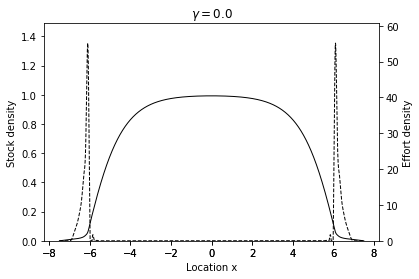

In [5]:
effort_stock_plot(sol[0],sol[1],gamma_1,1.5)

In [6]:
gamma_1 = 0
sol_3 = solve_model(function_3,icfnc_3(),t_end,nt,gamma_0,gamma_1)
sol = final_sol_3(sol_t)

Choice of gamma_0 = 0.00 
Choice of gamma_1 = 0.00 
Running model until t = 8000 s


KeyboardInterrupt: 

In [ ]:
u = sol[0]
lambdav = sol[1]
f_3 = f_so_3(u,lambdav,gamma_0,gamma_1)
effort_stock_plot(u,f_3,1.2)

In [18]:

def odesfnc_ns_stiff(t,y,gamma_0,gamma_1,case):
    u_res = y[:N-2]
    u = concatenate([[0],u_res,[0]])
    f_res = f_so_ns(u_res,case)
    f = f_so_ns(u,case)
    y3 = y[N-2:2*N-2]
    y4 = y[2*N-2:3*N-2]
    du = (y3[1:-1] - y4[1:-1]*u_res)*u_res - f_res*u_res + div_diff2(u)
    dy3 = 1/2*(1 - gamma_0*f - y3)
    dy4 = 1/2*(1 + gamma_1*f - y4)
    return concatenate([du,dy3,dy4])

solver = ode(lambda t,y : odesfnc_ns_stiff(t,y,gamma_0=gamma_0, gamma_1 = gamma_1, case = 1))
solver.set_integrator('dop853')

In [13]:
# Set the initial value z(0) = z0.
t0 = 0.0
z0 = icfnc_ns()
solver.set_initial_value(z0, t0)

In [20]:
# Create the array `t` of time values at which to compute
# the solution, and create an array to hold the solution.
# Put the initial value in the solution array.
t1 = 5
N = 75
t = linspace(t0, t1, N)

k = 1
while solver.successful() and solver.t < t1:
    solver.integrate(solver.t+t[k])
    sol[k] = solver.y
    k += 1

ValueError: operands could not be broadcast together with shapes (3,) (0,) 

In [21]:
solver.integrate(solver.t+0.1)

ValueError: operands could not be broadcast together with shapes (3,) (0,) 